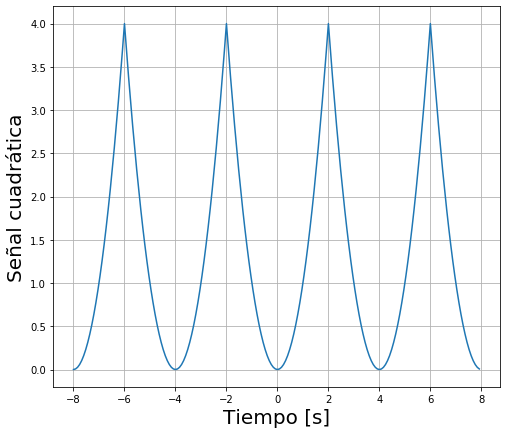

In [85]:
from matplotlib import pyplot
from numpy import pi, arange, sum, floor

pyplot.rcParams["figure.figsize"] = (8,7)

def cuadratic(amp: float, period: float, time: list) -> list:
    values = []
    for t in time:
        n = int(t / (period / 2))
        n = int((n + 1) / 2) if t > 0 else int((n - 1) / 2)
        values.append( (amp * (t - n * period) ** 2) )
    return values

amplitude = 1
period = 4
number_of_periods = 2
time = arange(- period * number_of_periods, period * number_of_periods, period / 50)
values = cuadratic(amplitude, period, time)

pyplot.plot(time, values)
pyplot.xlabel("Tiempo [s]", fontsize=20)
pyplot.ylabel("Señal cuadrática", fontsize=20)
pyplot.grid()
pyplot.savefig("cuadratica.png")
pyplot.show()

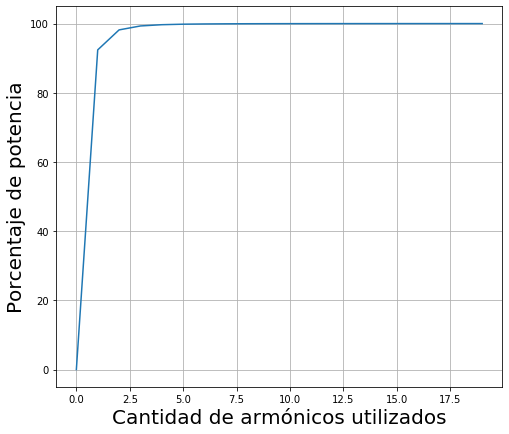

In [86]:
armonics = arange(0, 20, 1)
power_factor = [(90 / (pi ** 4)) * sum([1 / (n ** 4) for n in range(1, k + 1, 1)]) * 100 for k in armonics]

pyplot.plot(armonics, power_factor)
pyplot.xlabel("Cantidad de armónicos utilizados", fontsize=20)
pyplot.ylabel("Porcentaje de potencia", fontsize=20)
pyplot.grid()
pyplot.show()

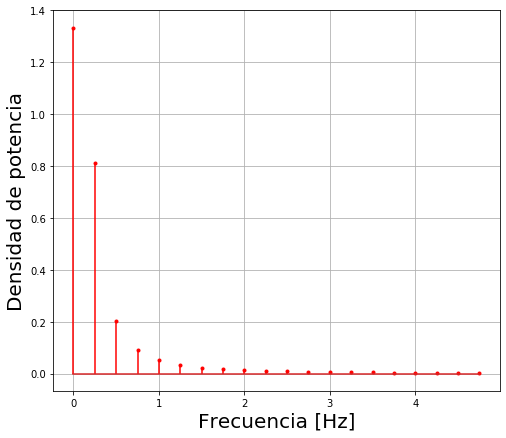

In [87]:
from scipy import signal
from numpy import abs

def power_n(amp: float, period: float, n: int):
    if n == 0:
        return (amp * period ** 2) / 12
    else:
        return (amp * period ** 2 * (-1) ** n) / (2 * pi ** 2 * n**2)

frequencies = [n / period for n in armonics]
density = [power_n(amplitude, period, n) for n in armonics]

pyplot.stem(frequencies, abs(density), 'r', markerfmt='r.', use_line_collection=True)
pyplot.xlabel("Frecuencia [Hz]", fontsize=20)
pyplot.ylabel("Densidad de potencia", fontsize=20)
pyplot.grid()
pyplot.show()

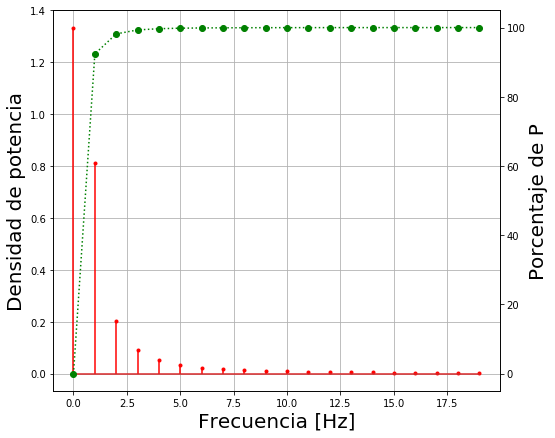

In [88]:
figure, axes = pyplot.subplots()

axes.stem(armonics, abs(density), 'r', markerfmt='r.', use_line_collection=True)
axes.set_xlabel("Frecuencia [Hz]", fontsize=20)
axes.set_ylabel("Densidad de potencia", fontsize=20)
axes.grid(which='both')

axes2 = axes.twinx()
axes2.plot(armonics, power_factor, color='green', marker='o', linestyle='dotted')
axes2.set_xlabel("Frecuencia [Hz]", fontsize=20)
axes2.set_ylabel("Porcentaje de P", fontsize=20)

pyplot.savefig("cuadratica_potencia.png")
pyplot.show()